In [4]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [5]:
desktop = pd.read_csv('See Desktop - See Mobile.csv')
mobile = pd.read_csv('See Mobile - See Desktop.csv')

In [6]:
# Degree
print(desktop["Degree"])
print(mobile["Degree"])
# Translate degrees into numbers for U-test 
# Some High School (Hauptschule/Realschule...) == 1
# High School (Abitur) == 2
# Bachelor's Degree == 3
# Master's Degree == 4
degreesDesktop = [3, 2, 3, 3, 2, 1, 4, 2, 3]
degreesMobile = [1, 4, 3, 4, 3, 3, 3, 3, 1]
mannwhitneyu(degreesDesktop, degreesMobile)

0                               Bachelor's Degree
1                            High School (Abitur)
2                               Bachelor's Degree
3                               Bachelor's Degree
4                            High School (Abitur)
5    Some High School (Hauptschule/Realschule...)
6                                 Master's Degree
7                            High School (Abitur)
8                               Bachelor's Degree
Name: Degree, dtype: object
0    Some High School (Hauptschule/Realschule...)
1                                 Master's Degree
2                               Bachelor's Degree
3                                 Master's Degree
4                               Bachelor's Degree
5                               Bachelor's Degree
6                               Bachelor's Degree
7                               Bachelor's Degree
8    Some High School (Hauptschule/Realschule...)
Name: Degree, dtype: object


MannwhitneyuResult(statistic=33.0, pvalue=0.506004590937926)

In [7]:
# ASQ U-TEST SAME DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ4' + str(x+1), result)

ASQ11 MannwhitneyuResult(statistic=29.0, pvalue=0.3005453490799965)
ASQ21 MannwhitneyuResult(statistic=43.5, pvalue=0.8141993712926219)
ASQ31 MannwhitneyuResult(statistic=15.5, pvalue=0.027471958616590037)
ASQ41 MannwhitneyuResult(statistic=22.0, pvalue=0.09439879299882575)
ASQ12 MannwhitneyuResult(statistic=30.0, pvalue=0.35658239335387365)
ASQ22 MannwhitneyuResult(statistic=31.5, pvalue=0.4170932470422536)
ASQ32 MannwhitneyuResult(statistic=23.5, pvalue=0.13906291753393626)
ASQ42 MannwhitneyuResult(statistic=27.5, pvalue=0.25076145203601363)
ASQ13 MannwhitneyuResult(statistic=38.5, pvalue=0.8836659809578449)
ASQ23 MannwhitneyuResult(statistic=35.5, pvalue=0.6602815071722536)
ASQ33 MannwhitneyuResult(statistic=24.0, pvalue=0.14464283165032438)
ASQ43 MannwhitneyuResult(statistic=22.0, pvalue=0.0930803679465405)


In [8]:
# ASQ U-TEST DIFFERENT DEVICE
for x in range(3):
    result = mannwhitneyu(desktop['ASQ1' + str(1+x)], mobile['ASQ1' + str(1+x)])
    print('ASQ1' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ2' + str(1+x)], mobile['ASQ2' + str(1+x)])
    print('ASQ2' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ3' + str(1+x)], mobile['ASQ3' + str(1+x)])
    print('ASQ3' + str(x+1), result)
    result = mannwhitneyu(desktop['ASQ4' + str(1+x)], mobile['ASQ4' + str(1+x)])
    print('ASQ4' + str(x+1), result)

ASQ11 MannwhitneyuResult(statistic=47.0, pvalue=0.574961711993179)
ASQ21 MannwhitneyuResult(statistic=37.5, pvalue=0.8070911851830875)
ASQ31 MannwhitneyuResult(statistic=7.0, pvalue=0.0029352087511973985)
ASQ41 MannwhitneyuResult(statistic=24.5, pvalue=0.15784514179830011)
ASQ12 MannwhitneyuResult(statistic=44.0, pvalue=0.7824685152910666)
ASQ22 MannwhitneyuResult(statistic=37.0, pvalue=0.7779324116598495)
ASQ32 MannwhitneyuResult(statistic=13.5, pvalue=0.017389822427381425)
ASQ42 MannwhitneyuResult(statistic=23.0, pvalue=0.11437947618667621)
ASQ13 MannwhitneyuResult(statistic=39.5, pvalue=0.9612208051396489)
ASQ23 MannwhitneyuResult(statistic=36.0, pvalue=0.696209688930925)
ASQ33 MannwhitneyuResult(statistic=20.5, pvalue=0.07350788385259734)
ASQ43 MannwhitneyuResult(statistic=20.5, pvalue=0.06982261911979498)


In [9]:
def calcSUS(df):
    dfSUS1 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","SUS21","SUS22","SUS23","SUS24","SUS25","SUS26","SUS27","SUS28","SUS29","SUS210","Improvements2"])
    dfSUS2 = df.drop(columns=["Timestamp","Age","Gender","Degree","SEE","Games","Device","Version","Developer","Time1","ASQ11","ASQ12","ASQ13","Time2","ASQ21","ASQ22","ASQ23","SUS11","SUS12","SUS13","SUS14","SUS15","SUS16","SUS17","SUS18","SUS19","SUS110","Improvements1","Time3","ASQ31","ASQ32","ASQ33","Time4","ASQ41","ASQ42","ASQ43","Improvements2"])
    scoresD1 = []
    scoresD2 = []
    dfResult = pd.DataFrame()
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS1.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD1.append(score)
    for cnt in range(9):
        score = 0
        sum = 0
        index = 1
        for value in dfSUS2.loc[cnt]:
            if (index) % 2 == 0:
                sum -= value
                index += 1
            else:
                sum += value
                index += 1
        score = 2.5 *(20 + sum)
        scoresD2.append(score)
    return scoresD1, scoresD2
    
    

In [10]:
susDesktop = calcSUS(desktop)[0] + calcSUS(mobile)[1]
susMobile =  calcSUS(desktop)[1] + calcSUS(mobile)[0]
print("SUS Desktop:")
print(susDesktop)
print("Desktop average:")
print(np.average(susDesktop))
print("SUS Mobile:")
print(susMobile)
print("Mobile average:")
print(np.average(susMobile))
print(mannwhitneyu(susDesktop, susMobile))

SUS Desktop:
[60.0, 57.5, 80.0, 60.0, 77.5, 70.0, 85.0, 52.5, 80.0, 87.5, 80.0, 50.0, 62.5, 85.0, 50.0, 92.5, 100.0, 85.0]
Desktop average:
73.05555555555556
SUS Mobile:
[37.5, 52.5, 82.5, 52.5, 52.5, 30.0, 87.5, 35.0, 42.5, 85.0, 47.5, 47.5, 55.0, 90.0, 50.0, 87.5, 97.5, 57.5]
Mobile average:
60.55555555555556
MannwhitneyuResult(statistic=219.5, pvalue=0.07068814365843198)


Desktop median: 78.75
Mobile median: 52.5


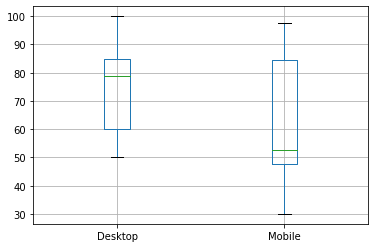

In [11]:
df = pd.DataFrame({"Desktop": susDesktop, "Mobile": susMobile})
print("Desktop median:", df["Desktop"].median())
print("Mobile median:", df["Mobile"].median())
boxplot = df.boxplot(column=['Desktop', 'Mobile'])  

<AxesSubplot:ylabel='Density'>

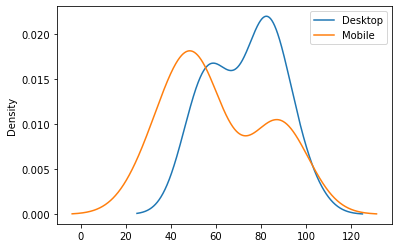

In [12]:
df.plot.kde()